Question 1.1

We recall that $\left\vert x_1-x_2\right\vert=\sqrt{(x_1-x_2)^2}$ whose partial derivatives are
$$\frac{\partial}{\partial x_1}\left(\left\vert x_1-x_2\right\vert\right)=\frac{x_1-x_2}{\left\vert x_1-x_2\right\vert}=-\frac{\partial}{\partial x_2}\left(\left\vert x_1-x_2\right\vert\right).$$

Eventually, the derivative of the potential reads
$$\left\{\begin{matrix}\displaystyle\frac{\partial V}{\partial x_1}(x_1,x_2)&=\displaystyle -\frac{x_1-x_2}{\left\vert x_1-x_2\right\vert^3}+2a_2x_1+4a_4x_1^3,\\
\displaystyle\frac{\partial V}{\partial x_2}(x_1,x_2)&=\displaystyle \frac{x_1-x_2}{\left\vert x_1-x_2\right\vert^3}+2a_2x_2+4a_4x_2^3.
\end{matrix}\right.$$

In [1]:
import numpy as np

def V(x1,x2,a2,a4):
    x22 = x2 * x2
    x12 = x1 * x1
    return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )

def gradV(x1,x2,a2,a4):
    x22 = x2 * x2
    x12 = x1 * x1
    dx = x1 - x2
    adx = np.absolute(dx) ** 3
    return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
    

Question 1.2

Two minima are found for $(x_1,x_2)=\left\{(1/2,-1/2),(-1/2,1/2)\right\}$ in the case $a_2=1$ and $a_4=0$. This represents a single minimum, up to the particle-exchange symmetry.

This can be recovered from a direct computation, by setting $x=x_2-x_1$, namely, 
$$V(x_1,x)=\frac{1}{\left\vert x\right\vert}+x_1^2+(x_1+x)^2=\frac{1}{\left\vert x\right\vert}+2x_1^2+2xx_1+x^2.$$
The partial derivatives read
$$\begin{cases}\displaystyle\frac{\partial V}{\partial x_1}(x_1,x)=4x_1+2x,\\
\displaystyle\frac{\partial V}{\partial x}(x_1,x)=\displaystyle-\frac{x}{\left\vert x\right\vert^3}+2x_1+2x.
\end{cases}$$
Equating the two equations to 0, one gets
$$\begin{cases}x_1=\displaystyle -\frac{x}{2},\\
\displaystyle-\frac{x}{\left\vert x\right\vert^3}+x=0.
\end{cases}$$
As $x\neq 0$, we find that $x=\pm 1$, resulting in the two above locations of the absolute minima.

Physically, each particle evolves in a harmonic potential, and the minimum of the potential which is found corresponds to the two particles put in the minimum of the potential which then repell each other due to the electrostatic interaction.

/tmp/ipykernel_3254915/189615005.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


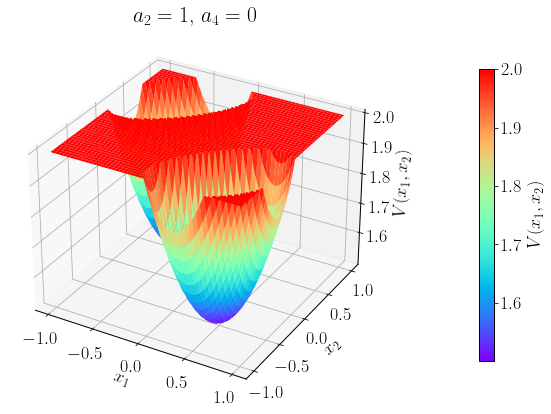

In [2]:
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt

#Direct input
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{lmodern} \usepackage{bm}')
#Options
params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 1.

X = np.linspace(- 1, 1, 200)
X1 = np.zeros((len(X), len(X) - 1))
X2 = np.zeros((len(X), len(X) - 1))
for i in range(len(X)):
    k = 0
    for j in range(len(X)):
        if j != i:
            X1[i,k] = X[j]
            X2[i,k] = X[i]
            k += 1
fig = plt.figure(figsize = (8, 8), tight_layout = True)
ax = plt.axes(projection='3d')
mappable = plt.cm.ScalarMappable(cmap = plt.cm.rainbow)
Z = V(X1, X2, 1, 0)
for i in range(np.shape(X1)[0]):
    for j in range(np.shape(X1)[1]):
        Z[i,j] = min(Z[i,j], 2)
mappable.set_array(Z)
Vmin = np.amin(Z)
ax.plot_surface(X1, X2, Z, cmap = mappable.cmap, vmin = Vmin)
fig.colorbar(mappable, pad = 0.2, fraction = 0.03, label = r'$V(x_1,x_2)$')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$V(x_1,x_2)$')
ax.set_title(r'$a_2=1$, $a_4=0$')
fig.show()

Question 1.3

If $\epsilon$ (size of the steps) increases, the number of steps to find the minimum increases as the system oscillates around the minimum. However, you cannot take as small $\epsilon$ as you want, otherwise the number of steps also increases as you are not moving much during one step. Eventually, if $\epsilon$ becomes too large, then the system cannot find the minimum anymore and the calculation diverges. There is an optimal value for $\epsilon\simeq 0.2$.

This can be quantified by measuring the number of steps $T$ as a function of $\epsilon$ for fixed $\eta=10^{-3}$.

A priori, $T$ depends on the choice of the initial condition, and an average should be done over several initial conditions, with the associated uncertainty (see TD 2).

/tmp/ipykernel_3254915/273780922.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )
/tmp/ipykernel_3254915/273780922.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
/tmp/ipykernel_3254915/1061075859.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


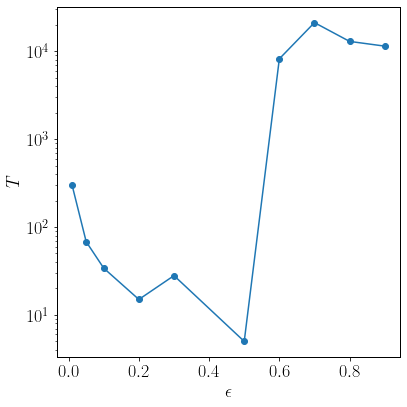

In [3]:
import numpy.random as rnd
import numpy.linalg as la

xmin = -2.
xmax = 2.
eta = 1e-3
eps_arr = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9])
T_arr = np.zeros(len(eps_arr))
for i in range(len(eps_arr)):
    rnd.seed()
    xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
    if xiter[1] > xiter[0]: # we exchange them in order to always fall in the same minimum
        tmp = xiter[0]
        xiter[0] = xiter[1]
        xiter[1] = tmp
    grad_iter = gradV( xiter[0], xiter[1], 1, 0)
    seq_V = [V(xiter[0], xiter[1], 1, 0)]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    while la.norm(grad_iter) > eta:
        xiter -= grad_iter * eps_arr[i]
        seq_V += [V(xiter[0], xiter[1], 1, 0)]
        grad_iter = gradV(xiter[0], xiter[1], 1, 0)
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
        T_arr[i] += 1
    
fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.semilogy(eps_arr, T_arr, '-o')
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$T$')
fig.show()

The number of steps also increases with decreasing $\eta$, with an approximate $-\ln\eta$ behaviour. This is a general property that can be derived by considering the time $T$ (in one dimension of space) to go from $x_0$ to $x_1$ under the gradient-descent dynamics $\dot{x}=-V'(x)$, namely, 
$$T(x_1)=\int_{x_0}^{x_1}\frac{\mathrm{d}x}{\dot{x}}=-\int_{x_0}^{x_1}\frac{\mathrm{d}x}{V'(x)}.$$
By linearising $V'(x)$ around the minimum $x^*$ of $V(x)$, one finds : $V'(x)=V'(x^*)+V''(x^*)(x-x^*)=V''(x^*)(x-x^*)$, resulting in
$$T(x_1)=-\frac{1}{V''(x^*)}\ln\left(\frac{x_1-x^*}{x_0-x^*}\right).$$
If the iteration stops when $\vert V'(x_1)\vert=\eta$, then one obtains that $\vert x_1-x^*\vert=\eta/\vert V''(x^*)\vert$, explaining why $T(x_1)\propto -\ln\eta$ up to numerical prefactors.

The standard practice is to consider $\eta\sim10^{-10}$.

/tmp/ipykernel_3254915/1359717456.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


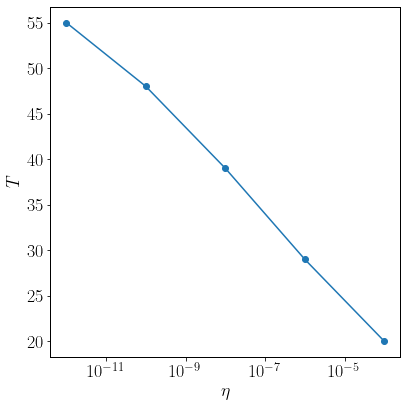

In [4]:
xmin = -2.
xmax = 2.
eps = 0.2
eta_arr = np.array([1e-4, 1e-6, 1e-8, 1e-10, 1e-12])
T_arr = np.zeros(len(eta_arr))
for i in range(len(eta_arr)):
    rnd.seed()
    xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
    if xiter[1] > xiter[0]: # we exchange them in order to always fall in the same minimum
        tmp = xiter[0]
        xiter[0] = xiter[1]
        xiter[1] = tmp
    grad_iter = gradV( xiter[0], xiter[1], 1, 0)
    seq_V = [V(xiter[0], xiter[1], 1, 0)]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    while la.norm(grad_iter) > eta_arr[i]:
        xiter -= grad_iter * eps
        seq_V += [V(xiter[0], xiter[1], 1, 0)]
        grad_iter = gradV(xiter[0], xiter[1], 1, 0)
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
        T_arr[i] += 1

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.semilogx(eta_arr, T_arr, '-o')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$T$')
fig.show()

Question 1.4

One clearly observes that the potential decreases exponentially to its minimum value (it is better to choose a small value of $\epsilon$, e.g., $\epsilon=0.04$).

This can be understood generically, for instance for a one-dimensional system evolving close to its minimum via the gradient-descent dynamics. Linearising the first-order derivative of the potential, the equation of motion reads $\dot{x}=-V''(x^*)(x-x^*)$, or by noting $\delta x=x-x^*$, 
$$\dot{\delta x}=-V''(x^*)\delta x.$$
$\delta x$ thus decays exponentially to zero, and so does the potential, because, for $x\simeq x^*$, we have that $V(x)\simeq V(x^*)+V''(x^*)(x-x^*)^2/2$, leading to
$$\dot{V(x)}=V''(x^*)\delta x\dot{\delta x}=-\left[V''(x^*)\delta x\right]^2=-2V''(x^*)\left[V(x)-V(x^*)\right].$$ 
Be careful that the argument is valid as long as the Hessian matrix at the minimum is not singular (see question 2.1 for an example).

/tmp/ipykernel_3254915/2773284825.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


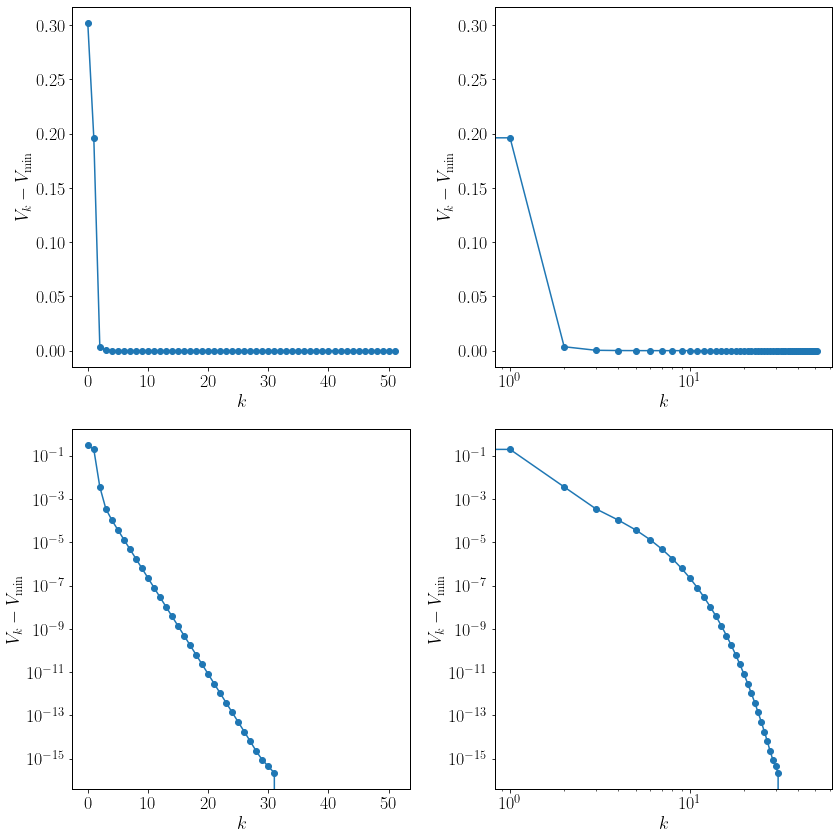

In [5]:
xmin = -2.
xmax = 2.
eps = 0.2
eta = 1e-10
rnd.seed()
xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
grad_iter = gradV( xiter[0], xiter[1], 1, 0)
seq_V = [V(xiter[0], xiter[1], 1, 0)]
seq_x1 = [xiter[0]]
seq_x2 = [xiter[1]]
while la.norm(grad_iter) > eta_arr[i]:
    xiter -= grad_iter * eps
    seq_V += [V(xiter[0], xiter[1], 1, 0)]
    grad_iter = gradV(xiter[0], xiter[1], 1, 0)
    seq_x1 += [xiter[0]]
    seq_x2 += [xiter[1]]

seq_V = np.array(seq_V)
Vmin = V(0.5, -0.5, 1, 0)
fig, ax = plt.subplots(2, 2, figsize = (12, 12), tight_layout = True)
ax[0,0].plot(seq_V - Vmin, '-o')
ax[0,1].semilogx(seq_V - Vmin, '-o')
ax[1,0].semilogy(seq_V - Vmin, '-o')
ax[1,1].loglog(seq_V - Vmin, '-o')
ax[0,0].set_xlabel(r'$k$')
ax[1,0].set_xlabel(r'$k$')
ax[0,1].set_xlabel(r'$k$')
ax[1,1].set_xlabel(r'$k$')
ax[0,0].set_ylabel(r'$V_k-V_\mathrm{min}$')
ax[0,1].set_ylabel(r'$V_k-V_\mathrm{min}$')
ax[1,0].set_ylabel(r'$V_k-V_\mathrm{min}$')
ax[1,1].set_ylabel(r'$V_k-V_\mathrm{min}$')
fig.show()

Question 1.5

The decay of $x_1$ and $x_2$ to the minimum is exponential for a small-enough value of $\epsilon$. Things get more messy when $\epsilon$ increases, as the system oscillates around the minimum. This has been explained in the previous question.

/tmp/ipykernel_3254915/2376948696.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


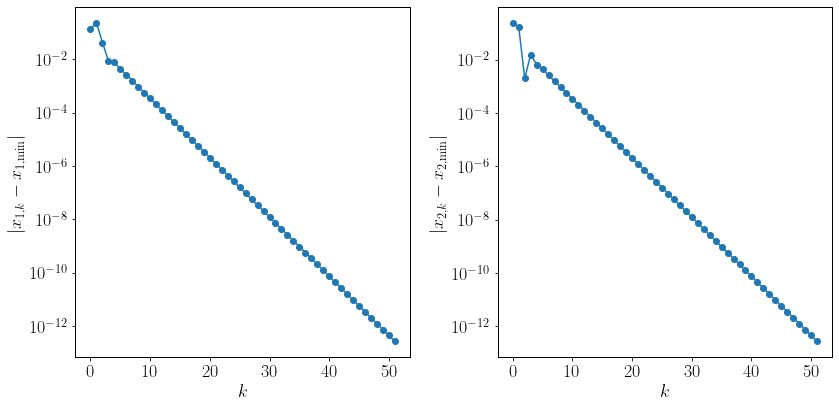

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
seq_x1 = np.array(seq_x1)
seq_x2 = np.array(seq_x2)
ax[0].semilogy(np.absolute(seq_x1 - seq_x1[-1] / np.absolute(seq_x1[-1]) / 2), '-o')
ax[1].semilogy(np.absolute(seq_x2 - seq_x2[-1] / np.absolute(seq_x2[-1]) / 2), '-o')
ax[0].set_xlabel(r'$k$')
ax[1].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$|x_{1,k}-x_{1,\mathrm{min}}|$')
ax[1].set_ylabel(r'$|x_{2,k}-x_{2,\mathrm{min}}|$')
fig.show()

Question 1.6

We now find three minima (up to the particle-exchange symmetry): a global minimum for $(x_1,x_2)\simeq(-1.7355,1.7355)$ and two equivalent local minima for $(x_1,x_2)\simeq\left\{(1.465,1.912),(-1.465,-1.912)\right\}$. Once again, one may derive the number of solutions analytically, but the locations of the minima can only be found numerically or graphically (see below).

Physically, each particule evolves in a quartic potential with two equivalent minima for $x=\pm\sqrt{3}\simeq 1.732$. The global minimum corresponds to each particle in a different minimum of the quartic potential, as in this situation the electrostatic repulsion is decreased. Instead, the two other minima are found when the two particles are put in the same minimum of the quartic potential and then repell each other due to the electrostatic interaction. This situation is less favorable energetically.

We now derive the locations of the minima analytically. We still do the change of variable $x=x_2-x_1$:
$$V(x_1,x)=-\frac{1}{\vert x\vert}-6x_1^2-6(x_1+x)^2+x_1^4+(x_1+x)^4.$$
The two partial derivatives read:
$$\left\{\begin{matrix}
\displaystyle \frac{\partial V}{\partial x_1}(x_1,x)&=\displaystyle -12x_1-12(x_1+x)+4x_1^3+4(x_1+x)^3, \\
\displaystyle \frac{\partial V}{\partial x}(x_1,x)&=\displaystyle -\frac{x}{\vert x\vert^3}-12(x_1+x)+4(x_1+x)^3.
\end{matrix}\right.$$
The first equation is a third degree polynomial in $x_1$ with a trivial root $x_1=-x/2$. One can thus easily rewrite the first equation as
$$8\left(x_1+\frac{x}{2}\right)\left(x_1^2+xx_1+x^2-3\right)=0,$$
with solutions 
$$x_1=-\frac{x}{2}, \ x_1=-\frac{x}{2}+\frac{\sqrt{3(4-x^2)}}{2}, \ x_1=-\frac{x}{2}-\frac{\sqrt{3(4-x^2)}}{2}.$$
Inserting the first solution into the partial derivative of $V(x_1,x)$ with respect to $x$ and equating to zero yield (after simplifying by $x\neq 0$)
$$-\frac{1}{\vert x\vert^3}=6-\frac{x^2}{2},$$
with two symmetric solutions whose locations can be found graphically by plotting the two functions in the left- and right-hand side.

Equivalently, inserting the second or third solution yields
$$-\frac{1}{\vert x\vert^3}=4\left(x^2-3\right),$$
with two symmetric solutions too whose locations can be found graphically by plotting the two functions in the left- and right-hand side.

Eventually, this represents (up to the particle-exchange symmetry) three different solutions with the two last solutions being equivalent.

/tmp/ipykernel_3254915/2095338555.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


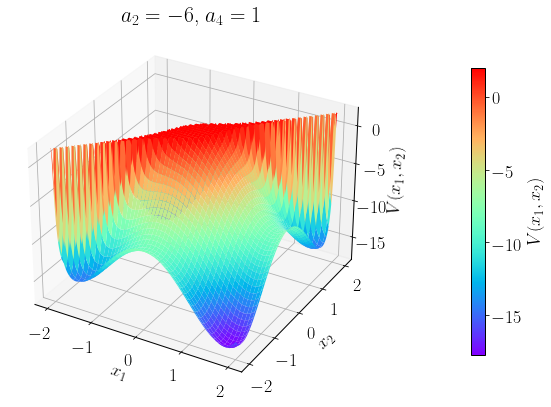

In [7]:
X = np.linspace(- 2, 2, 200)
X1 = np.zeros((len(X), len(X) - 1))
X2 = np.zeros((len(X), len(X) - 1))
for i in range(len(X)):
    k = 0
    for j in range(len(X)):
        if j != i:
            X1[i,k] = X[j]
            X2[i,k] = X[i]
            k += 1
fig = plt.figure(figsize = (8, 8), tight_layout = True)
ax = plt.axes(projection='3d')
mappable = plt.cm.ScalarMappable(cmap = plt.cm.rainbow)
Z = V(X1, X2, -6, 1)
for i in range(np.shape(X1)[0]):
    for j in range(np.shape(X1)[1]):
        Z[i,j] = min(Z[i,j], 2)
mappable.set_array(Z)
Vmin = np.amin(Z)
ax.plot_surface(X1, X2, Z, cmap = mappable.cmap, vmin = Vmin)
#ax.view_init(elev = 0, azim = - 135)
fig.colorbar(mappable, pad = 0.2, fraction = 0.03, label = r'$V(x_1,x_2)$')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$V(x_1,x_2)$')
ax.set_title(r'$a_2=-6$, $a_4=1$')
fig.show()

Question 1.7

Be careful to take $\epsilon$ smaller than for the quadratic potential, in order to avoid divergences. In this case $\epsilon\simeq 0.04$ seems to be an optimal value.

/tmp/ipykernel_3254915/273780922.py:5: RuntimeWarning: overflow encountered in double_scalars
  x12 = x1 * x1
/tmp/ipykernel_3254915/273780922.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )
/tmp/ipykernel_3254915/273780922.py:10: RuntimeWarning: overflow encountered in double_scalars
  x12 = x1 * x1
/tmp/ipykernel_3254915/273780922.py:12: RuntimeWarning: overflow encountered in double_scalars
  adx = np.absolute(dx) ** 3
/tmp/ipykernel_3254915/273780922.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
/tmp/ipykernel_3254915/3782741288.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


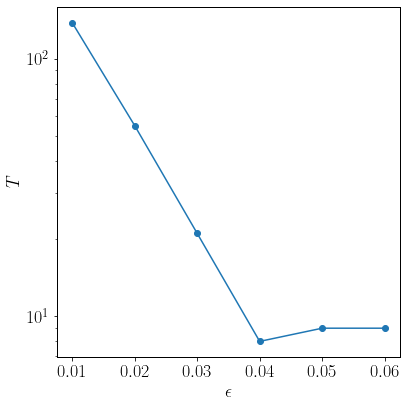

In [8]:
import numpy.random as rnd
import numpy.linalg as la

xmin = -2.
xmax = 2.
eta = 1e-10
eps_arr = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
T_arr = np.zeros(len(eps_arr))
x1_fin_arr = np.zeros(len(eps_arr))
x2_fin_arr = np.zeros(len(eps_arr))
V_fin_arr = np.zeros(len(eps_arr))
for i in range(len(eps_arr)):
    rnd.seed()
    xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
    if xiter[1] > xiter[0]: # we exchange them in order to always fall in the same minimum
        tmp = xiter[0]
        xiter[0] = xiter[1]
        xiter[1] = tmp
    grad_iter = gradV( xiter[0], xiter[1], -6, 1)
    seq_V = [V(xiter[0], xiter[1], -6, 1)]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    while la.norm(grad_iter) > eta:
        xiter -= grad_iter * eps_arr[i]
        seq_V += [V(xiter[0], xiter[1], -6, 1)]
        grad_iter = gradV(xiter[0], xiter[1], -6, 1)
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
        T_arr[i] += 1
    x1_fin_arr[i] = xiter[0]
    x2_fin_arr[i] = xiter[1]
    V_fin_arr[i] = seq_V[-1]
    
fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.semilogy(eps_arr, T_arr, '-o')
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$T$')
fig.show()

For some initial conditions, one finds that the gradient-descent dynamics ends up in one of the two equivalent local minima, instead of the wanted global minimum. This is a first drawback of the gradient-descent if one aims to find the global minimum.

Besides, one finds that $\epsilon$ should be taken even lower than the optimum value found before, because the location of the system diverges a few times. It seems that $\epsilon\simeq 0.02$ is a better choice.

/tmp/ipykernel_3254915/273780922.py:4: RuntimeWarning: overflow encountered in double_scalars
  x22 = x2 * x2
/tmp/ipykernel_3254915/273780922.py:5: RuntimeWarning: overflow encountered in double_scalars
  x12 = x1 * x1
/tmp/ipykernel_3254915/273780922.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )
/tmp/ipykernel_3254915/273780922.py:9: RuntimeWarning: overflow encountered in double_scalars
  x22 = x2 * x2
/tmp/ipykernel_3254915/273780922.py:10: RuntimeWarning: overflow encountered in double_scalars
  x12 = x1 * x1
/tmp/ipykernel_3254915/273780922.py:12: RuntimeWarning: overflow encountered in double_scalars
  adx = np.absolute(dx) ** 3
/tmp/ipykernel_3254915/273780922.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
/tmp/ipykernel_3254915/2487553340.py:36

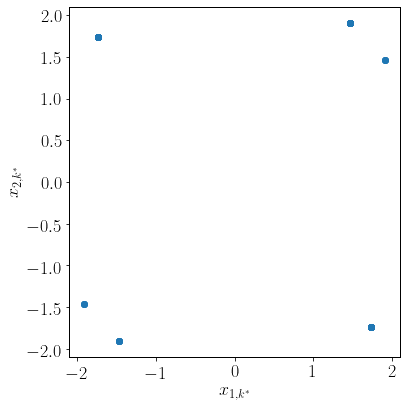

In [9]:
import numpy.random as rnd
import numpy.linalg as la

xmin = -2.
xmax = 2.
eta = 1e-10
eps = 0.02

x1_fin_arr = []
x2_fin_arr = []
V_fin_arr = []
nrun = 50
i = 0
while i < nrun:
    rnd.seed()
    xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
    grad_iter = gradV( xiter[0], xiter[1], -6, 1)
    seq_V = [V(xiter[0], xiter[1], -6, 1)]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    while la.norm(grad_iter) > eta:
        xiter -= grad_iter * eps
        seq_V += [V(xiter[0], xiter[1], -6, 1)]
        grad_iter = gradV(xiter[0], xiter[1], -6, 1)
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
    x1_fin_arr += [xiter[0]]
    x2_fin_arr += [xiter[1]]
    V_fin_arr += [seq_V[-1]]
    i += 1

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.scatter(np.array(x1_fin_arr), np.array(x2_fin_arr))
ax.set_xlabel(r'$x_{1,k^*}$')
ax.set_ylabel(r'$x_{2,k^*}$')
fig.show()

Question 2.1

We now consider $$U(x_1,x_2)=\left(x_1-\frac{x_2}{2}\right)^4+x_1^6$$
which presents a single minimum at the origin. However, this minimum is "flat" as the Hessian matrix (matrix of second derivatives) vanishes at the minimum.

We should here test the optimal choice for $\epsilon$, but we stick to a low-enough value of $\epsilon\simeq 0.2$.

The decay to the minimum is no longer an exponential but a power law decaying function which is much slower. This is because the Hessian matrix vanishes (see question 1.4). This is a second drawback of the gradient-descent method. This can still be understood from a schematic calculation for a one-dimensional system, by now considerong $V(x)=V(x^*) + (x-x^*)^3/6 V'''(x^*)$. The equation of motion now reads
$$ \dot{x}=-\frac{1}{2}V'''(x^*)(x-x^*)^2 \Longrightarrow \frac{\dot{\delta x}}{\delta x^2}=-\frac{1}{2}V'''(x^*)\Longrightarrow \frac{1}{\delta x(t)}-\frac{1}{\delta x(0)}=\frac{1}{2}V'''(x^*)t\Longrightarrow \delta x(t)=\frac{2\delta x(0)}{2+V'''(x^*)\delta x(0)t}.$$

Be careful not to take a very small value of $\eta$ because now the decay is algebraic! In other words if you want $\eta$ 10 times smaller, you have to perform a simulation which is also ten times smaller (if the power law is indeed of exponent 1, which turns out to be the case numerically).

/tmp/ipykernel_3254915/3791056891.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


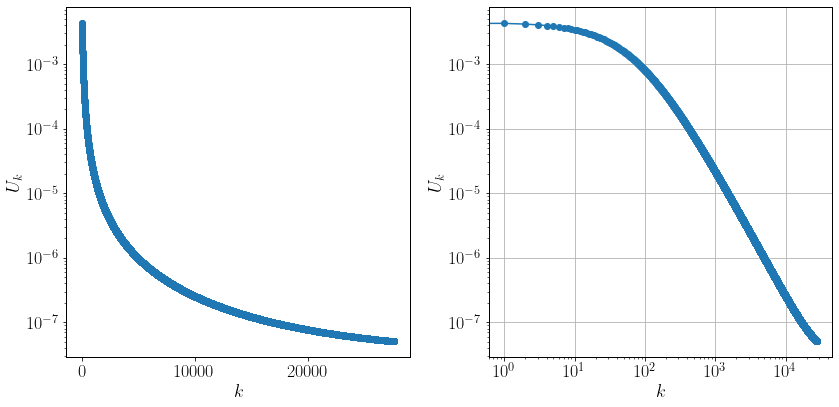

In [10]:
def U(x1,x2):
    return ( x1 - 0.5 * x2 ) ** 4 + x1 ** 6

def gradU(x1,x2):
    dx = ( x1 - 0.5 * x2 ) ** 3
    return np.array( [ 4 * dx + 6 * x1 ** 5, - 2 * dx ] )

xmin = - 0.5
xmax = 0.5
eta = 1e-5
rnd.seed() 
xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
grad_iter = gradU(xiter[0], xiter[1])
seq_U = [U(xiter[0], xiter[1])]
seq_x1 = [xiter[0]]
seq_x2 = [xiter[1]]
while la.norm(grad_iter) > eta:
    xiter -= grad_iter * eps
    seq_U += [U(xiter[0], xiter[1])]
    grad_iter = gradU(xiter[0], xiter[1])
    seq_x1 += [xiter[0]]
    seq_x2 += [xiter[1]]

seq_U = np.array(seq_U)
seq_x1 = np.array(seq_x1)
seq_x2 = np.array(seq_x2)

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].semilogy(seq_U, '-o')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$U_k$')
ax[1].loglog(seq_U,'-o')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$U_k$')
ax[1].grid()
fig.show()

Question 2.2

The convergence becomes faster under the Polyak dynamics and gets increasingly faster when $\beta$ increases. To see that the potential evolves in a non-monotonic way due to inertia, it is better to increase the value of $\epsilon$ and $\beta$.

/tmp/ipykernel_3254915/1084529623.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


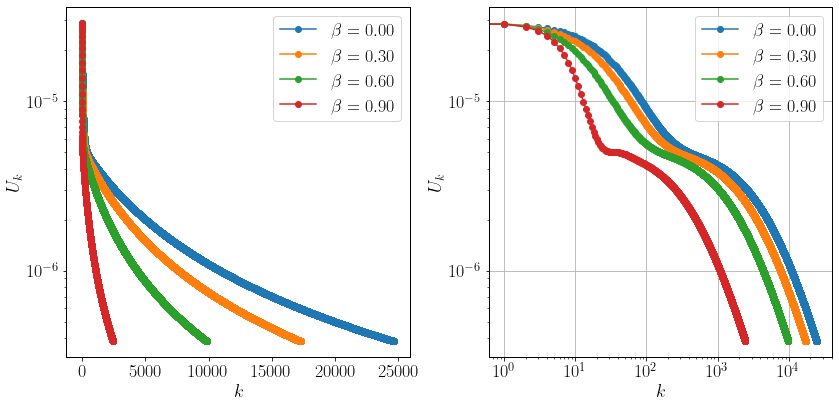

In [11]:
xmin = - 0.5
xmax = 0.5
eta = 1e-5
eps = 0.2
rnd.seed()
xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
xinit = np.copy(xiter)
beta_arr = np.array([0., 0.3, 0.6, 0.9])
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$U_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$U_k$')

for beta in beta_arr:
    #Step 0
    xiter = np.copy(xinit)
    seq_U = [U(xiter[0], xiter[1])]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    grad_iter = gradU(xiter[0], xiter[1])

    #Step 1
    xiterm1 = np.copy(xinit)
    xiter -= grad_iter * eps
    grad_iter = gradU(xiter[0], xiter[1])
    seq_U += [U(xiter[0], xiter[1])]
    seq_x1 += [xiter[0]]
    seq_x2 += [xiter[1]]

    #Step > 1
    while(la.norm(grad_iter)>eta):
        tmp = np.copy(xiter)
        xiter += -grad_iter * eps + beta * ( xiter - xiterm1 )
        xiterm1 = np.copy(tmp)
        seq_U += [U(xiter[0], xiter[1])]
        grad_iter = gradU(xiter[0], xiter[1])
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
        
    seq_U = np.array(seq_U)
    seq_x1 = np.array(seq_x1)
    seq_x2 = np.array(seq_x2)
    ax[0].semilogy(seq_U, '-o', label=r'$\beta={0:.2f}$'.format(beta))
    ax[1].loglog(seq_U, '-o', label=r'$\beta={0:.2f}$'.format(beta))

ax[0].legend()
ax[1].grid()
ax[1].legend()
fig.show()

Question 2.3

We come back here to the quadratic or quartic potential and we perform the three methods for a single value $\beta=0.5$.

For the Nesterov method, we start from a random $\mathbf{x}_0=\mathbf{y}_0$, and we use the iteration formulas:
$$\left\{\begin{matrix} \mathbf{x}_{k+1}=\mathbf{y}_k-\epsilon\nabla V(\mathbf{y}_k), \\
\mathbf{y}_{k+1}=\displaystyle \mathbf{x}_{k+1}+\frac{k}{k+3}\left(\mathbf{x}_{k+1}-\mathbf{x}_k\right).\end{matrix}\right.$$

The Nesterov method becomes more efficient at lower $\epsilon$, and the Polyak method at smaller $\beta$.

/tmp/ipykernel_3254915/223992825.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


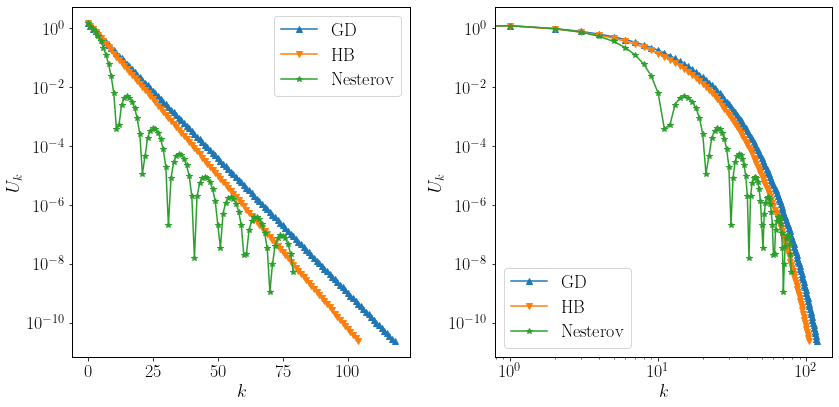

In [12]:
xmin = -2
xmax = 2
"""
Parameters to be modified
"""
a2 = 1
a4 = 0
Vmin = V(0.5, -0.5, a2, a4)
"""
End of parameters to be modified
"""
rnd.seed()
xiter = rnd.random_sample(2) * ( xmax - xmin ) + xmin
xinit = np.copy(xiter)
grad_iter = gradV(xiter[0], xiter[1], a2, a4)
eps = 0.05
eta = 1e-5
beta = 0.1
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$U_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$U_k$')

#GD
seq_V = [V(xiter[0], xiter[1], a2, a4)]
seq_x1 = [xiter[0]]
seq_x2 = [xiter[1]]
while la.norm(grad_iter) > eta:
    xiter -= grad_iter * eps
    seq_V += [V(xiter[0], xiter[1], a2, a4)]
    grad_iter = gradV(xiter[0], xiter[1], a2, a4)
    seq_x1 += [xiter[0]]
    seq_x2 += [xiter[1]]
ax[0].semilogy(np.array(seq_V) - Vmin, '-^', label = 'GD')
ax[1].loglog(np.array(seq_V) - Vmin, '-^', label = 'GD')

#Heavy-ball
xiter = np.copy(xinit)
seq_V_hb = [V(xiter[0], xiter[1], a2, a4)]
seq_x1_hb = [xiter[0]]
seq_x2_hb = [xiter[1]]
grad_iter = gradV(xiter[0], xiter[1], a2, a4)
xiterm1 = np.copy(xinit)
xiter -= grad_iter * eps
grad_iter = gradV(xiter[0], xiter[1], a2, a4)
seq_V_hb += [V(xiter[0], xiter[1], a2, a4)]
seq_x1_hb += [xiter[0]]
seq_x2_hb += [xiter[1]]
while la.norm(grad_iter) > eta:
    tmp = np.copy(xiter)
    xiter += - grad_iter * eps + beta * ( xiter - xiterm1 )
    xiterm1 = np.copy(tmp)
    seq_V_hb += [V(xiter[0], xiter[1], a2, a4)]
    grad_iter = gradV(xiter[0], xiter[1], a2, a4)
    seq_x1_hb += [xiter[0]]
    seq_x2_hb += [xiter[1]]
ax[0].semilogy(np.array(seq_V_hb) - Vmin, '-v', label = 'HB')
ax[1].loglog(np.array(seq_V_hb) - Vmin, '-v', label = 'HB')

#Nesterov
xiter = np.copy(xinit) #x0
grad_iter = gradV(xiter[0], xiter[1], a2, a4)
seq_V_nest = [V(xiter[0], xiter[1], a2, a4)]
seq_x1_nest = [xiter[0]]
seq_x2_nest = [xiter[1]]
xiter -= grad_iter * eps #x1
seq_V_nest += [V(xiter[0], xiter[1], a2, a4)]
seq_x1_nest += [xiter[0]]
seq_x2_nest += [xiter[1]]
yiter = np.copy(xiter) #y1
grad_iter = gradV(yiter[0], yiter[1], a2, a4)
k = 2
while la.norm(grad_iter) > eta:
    xiterm1 = np.copy(xiter)
    xiter = yiter - grad_iter * eps
    yiter = xiter + ( k - 1. ) / ( k + 2. ) * ( xiter - xiterm1 )
    grad_iter = gradV(yiter[0], yiter[1], a2, a4)
    k += 1
    seq_V_nest += [V(xiter[0], xiter[1], a2, a4)]
    seq_x1_nest += [xiter[0]]
    seq_x2_nest += [xiter[1]]
ax[0].semilogy(np.array(seq_V_nest) - Vmin, '-*', label = 'Nesterov')
ax[1].loglog(np.array(seq_V_nest) - Vmin, '-*', label = 'Nesterov')
    
ax[0].legend()
ax[1].legend()
fig.show()

Question 3.1

We start by optmising the simulating annealing strategy, and we first fix $\Delta$ to have a reasonable acceptance rate of about 50 \%. As we are going to vary the temperature systematically, we need to look for the best $\Delta$ for various values of $T$. We find that an appropriate choice is $\Delta\simeq 0.4\sqrt{T}$.

/tmp/ipykernel_3254915/3444132178.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


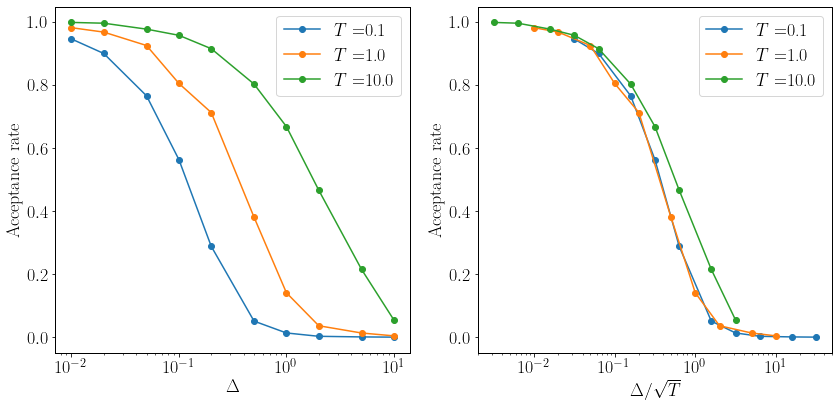

In [13]:
xmin = - 2
xmax = 2
a2 = - 6
a4 = 1
rnd.seed()
xinit = rnd.random_sample(2) * ( xmax - xmin ) + xmin
delta_arr = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5., 10.])
T_arr = np.array([0.1, 1., 10.])
acc_rate = np.zeros((len(T_arr), len(delta_arr)))
M = 20000
for i in range(len(T_arr)):
    for j in range(len(delta_arr)):
        xiter = np.copy(xinit)
        Viter = V(xiter[0], xiter[1], a2, a4)
        k = 0
        while k < M:
            dx = rnd.random_sample(2) * 2 * delta_arr[j] - delta_arr[j]
            xtry = xiter + dx
            Vtry = V(xtry[0], xtry[1], a2, a4)
            dV = Vtry - Viter
            if dV < 0:
                xiter = np.copy(xtry)
                Viter = Vtry
                acc_rate[i,j] += 1
            else:
                z = rnd.random_sample()
                if np.exp( - dV / T_arr[i] ) > z:
                    xiter = np.copy(xtry)
                    Viter = Vtry
                    acc_rate[i,j] += 1
            k += 1
acc_rate /= M

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
for i in range(len(T_arr)):
    ax[0].semilogx(delta_arr, acc_rate[i,:], '-o', label = r'$T=$' + '{0}'.format(T_arr[i]))
    ax[1].semilogx(delta_arr / np.sqrt(T_arr[i]), acc_rate[i,:], '-o', label = r'$T=$' + '{0}'.format(T_arr[i]))
ax[0].legend()
ax[0].set_xlabel(r'$\Delta$')
ax[0].set_ylabel(r'Acceptance rate')
ax[1].legend()
ax[1].set_xlabel(r'$\Delta/\sqrt{T}$')
ax[1].set_ylabel(r'Acceptance rate')
fig.show()

We indeed find that the simulated annealing scheme more often finds the global minimum, as compared to the gradient-descent dynamics. 

The idea is that the temperature provides some kinetic energy to the system which enables it to escape from the local minima. If $M$ increases, we let the system equilibrate more at a given temperature, and it thus has more chance to escape from the local minima. This is almost equivalent to considering a small temperature change. Instead, if the temperature is changed too significantly or if the system has not enough time to equilibrate at a given temperature, the system can remain trapped in a local minimum.

The result gets better for larger $M$ or lower temperature decrement.

/tmp/ipykernel_3254915/273780922.py:6: RuntimeWarning: overflow encountered in double_scalars
  return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )
/tmp/ipykernel_3254915/273780922.py:12: RuntimeWarning: overflow encountered in double_scalars
  adx = np.absolute(dx) ** 3
/tmp/ipykernel_3254915/273780922.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
/tmp/ipykernel_3254915/273780922.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 1. / np.absolute(x1 - x2) + a2 * ( x12 + x22 ) + a4 * ( x12 * x12 + x22 * x22 )
/tmp/ipykernel_3254915/273780922.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([- dx / adx + 2 * x1 * ( a2 + 2 * a4 * x12 ), dx / adx + 2 * x2 * ( a2 + 2 * a4 * x22 )])
/tmp/ipykernel_3254915/4100676238.py:92: UserWarning: Matplotlib is currently using module://m

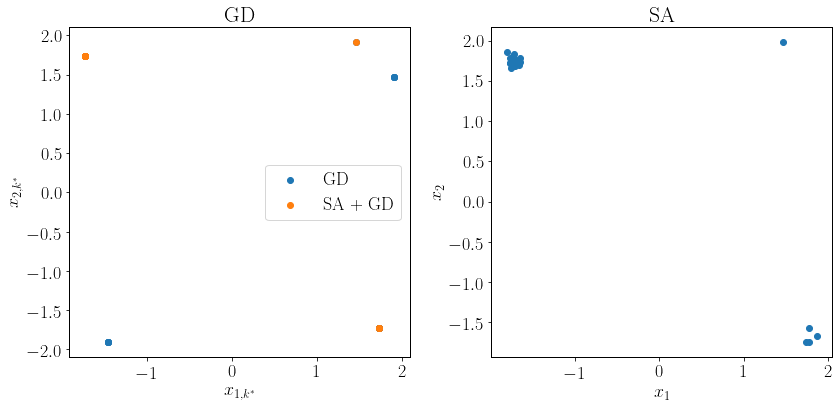

In [14]:
xmin = - 2
xmax = 2
a2 = - 6
a4 = 1
eps = 0.02
eta = 1e-6
nrun = 20

#GD
x1_fin_arr = []
x2_fin_arr = []
V_fin_arr = []
xinit_arr = []
for j in range(nrun):
    rnd.seed()
    xinit = rnd.random_sample(2) * ( xmax - xmin ) + xmin
    xinit_arr += [xinit]
    xiter = np.copy(xinit)
    grad_iter = gradV(xiter[0], xiter[1], a2, a4)
    seq_V = [V(xiter[0], xiter[1], a2, a4)]
    seq_x1 = [xiter[0]]
    seq_x2 = [xiter[1]]
    while la.norm(grad_iter) > eta:
        xiter -= grad_iter * eps
        seq_V += [V(xiter[0], xiter[1], a2, a4)]
        grad_iter = gradV(xiter[0], xiter[1], a2, a4)
        seq_x1 += [xiter[0]]
        seq_x2 += [xiter[1]]
    x1_fin_arr += [xiter[0]]
    x2_fin_arr += [xiter[1]]
    V_fin_arr += [V(xiter[0], xiter[1], a2, a4)]
    
#Simulated annealing
x1_fin_arr_sa = []
x2_fin_arr_sa = []
V_fin_arr_sa = []
x1_fin_arr_sa_gd = []
x2_fin_arr_sa_gd = []
V_fin_arr_sa_gd = []
M = 2000
dT = 0.1
for j in range(nrun):
    xiter = np.copy(xinit_arr[j])
    Viter = V(xiter[0], xiter[1],a2, a4)
    seq_V_sa = [Viter]
    seq_x1_sa = [xiter[0]]
    seq_x2_sa = [xiter[1]]
    T = 10
    while T >= 0:
        i = 0
        delta = 0.4 * np.sqrt(T)
        while i < M:
            dx = rnd.random_sample(2) * 2 * delta - delta
            xtry = xiter + dx
            Vtry = V(xtry[0], xtry[1], a2, a4)
            dV = Vtry - Viter
            if dV < 0:
                xiter = np.copy(xtry)
                Viter = Vtry
            else:
                z = rnd.random_sample()
                if np.exp( - dV / T ) > z:
                    xiter = np.copy(xtry)
                    Viter = Vtry
            seq_V_sa += [Viter]
            seq_x1_sa += [xiter[0]]
            seq_x2_sa += [xiter[1]]
            i += 1
        T -= dT
    x1_fin_arr_sa += [xiter[0]]
    x2_fin_arr_sa += [xiter[1]]
    V_fin_arr_sa += [V(xiter[0], xiter[1], a2, a4)]
    grad_iter = gradV(xiter[0], xiter[1], a2, a4)
    while la.norm(grad_iter) > eta:
        xiter -= grad_iter * eps
        grad_iter = gradV(xiter[0], xiter[1], a2, a4)
    x1_fin_arr_sa_gd += [xiter[0]]
    x2_fin_arr_sa_gd += [xiter[1]]
    V_fin_arr_sa_gd += [V(xiter[0], xiter[1], a2, a4)]

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].scatter(np.array(x1_fin_arr), np.array(x2_fin_arr), label = 'GD')
ax[1].scatter(np.array(x1_fin_arr_sa), np.array(x2_fin_arr_sa))
ax[0].scatter(np.array(x1_fin_arr_sa_gd), np.array(x2_fin_arr_sa_gd), label = 'SA + GD')
ax[0].set_xlabel(r'$x_{1,k^*}$')
ax[0].set_ylabel(r'$x_{2,k^*}$')
ax[1].set_xlabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[0].set_title('GD')
ax[1].set_title('SA')
ax[0].legend()
fig.show()